In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import shap
import time
import joblib

In [2]:
input_path = "C:\\Users\\user\\Desktop\\이현우\\연구실 코드\\FOS - Feature Outlier Score\\02.FOS\\01.Input\\"
output_path = "C:\\Users\\user\\Desktop\\이현우\\연구실 코드\\FOS - Feature Outlier Score\\02.FOS\\03.Output\\"

In [3]:
# 전처리가 완료된 Train Dataset 파일명(확장자 제외) 입력
# [조건]\n1.Index는 제거\n2. 마지막 column은 'label'
train_filename = "2019Train(label)_677+Indicator104Feature"
filename = input_path+train_filename+".csv"
filename_out = "FOS_"+train_filename+"_.csv"
global_filename="Global_"+train_filename+".csv"

# 학습된 AI model 파일명 입력
model_name = "LightGBM Model_2019Train(label)_677+Indicator104Feature.pkl"
#model = joblib.load(input_path+model_name) #뒤에서 불러옴

In [4]:
Train_dataset = pd.read_csv(filename)

col=Train_dataset.columns[0:]
Features=Train_dataset.columns[1:-1]
# X (feature) 정의
X_train=Train_dataset[Features]
# y (label) 정의
y_train=Train_dataset['Label']

#앞으로 데이터를 나눌때는 다음과 같이 나눔으로 형식 잘보기

In [5]:
Train_dataset

,FileName,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,...,Str_Win32_Winsock2_Library,Misc_Suspicious_Strings,System_Tools,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net,Label
0,0001c3c7e4c275cc399237280f8b6180.vir,3,1,1,3,4,1,5,2,3,...,0,0,0,0,0,0,0,0,0,0
1,0001fae05d329f3fc488ff55533b5a7a.vir,2,1,1,2,4,1,5,2,3,...,0,0,0,0,0,0,0,0,0,0
2,0002a9c82c0672447df932cda3262457.vir,2,8,1,1,1,1,5,1,2,...,1,0,0,0,0,0,0,0,0,1
3,00038db9d3a1b69f3b2804c9d1147b31.vir,2,5,1,2,2,1,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,0004eb860865c88b501a2000c2bceb70.vir,3,1,1,1,4,1,5,2,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29125,fff621af41a168882551b8a5d0e972b8.vir,4,8,1,4,4,1,5,2,4,...,1,0,0,0,0,0,0,0,0,1
29126,fff8ef9b45bbcb8aca7cb6acdef7d4ba.vir,2,1,1,1,1,1,5,1,1,...,1,0,1,0,0,0,0,0,0,1
29127,fff9386da527b906206963e396324919.vir,3,1,2,4,2,1,5,2,3,...,1,0,0,0,0,0,1,0,0,0
29128,fff98fa462275f7c265321ba4439942c.vir,2,1,1,1,1,1,5,1,3,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X_train

,SizeOfInitializedData,DllCharacteristics,MajorImageVersion,CheckSum,NumberOfSections,Known_Sections_por,Unknown_Sections_por,Rdata_VirtualSize_por,Text_VirtualSize_por,Reloc_VirtualSize_por,...,CN_Packed_Scanner,Str_Win32_Winsock2_Library,Misc_Suspicious_Strings,System_Tools,VirtualPC_Detection,VM_Generic_Detection,MSVB6,MSVC2010,MSVC6,ms_vc_net
0,3,1,1,3,4,1,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,4,1,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
2,2,8,1,1,1,1,5,1,2,1,...,0,1,0,0,0,0,0,0,0,0
3,2,5,1,2,2,1,5,2,2,3,...,0,0,0,0,0,0,0,0,0,0
4,3,1,1,1,4,1,5,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29125,4,8,1,4,4,1,5,2,4,2,...,0,1,0,0,0,0,0,0,0,0
29126,2,1,1,1,1,1,5,1,1,1,...,0,1,0,1,0,0,0,0,0,0
29127,3,1,2,4,2,1,5,2,3,3,...,0,1,0,0,0,0,0,1,0,0
29128,2,1,1,1,1,1,5,1,3,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Train_dataset_list = Train_dataset.values.tolist()
# values.tolist() : 전체 값을 2차원 리스트로 반환

In [8]:
Train_dataset_normal = []
Train_dataset_malware = []

for i in Train_dataset_list:
    if i[-1] == 0:
        Train_dataset_normal.append(i)
    else:
        Train_dataset_malware.append(i) 
# 전체 데이터셋을 라벨 값에 따라 분류 

In [9]:
Train_dataset_normal = pd.DataFrame(Train_dataset_normal,columns=col)
Train_dataset_malware = pd.DataFrame(Train_dataset_malware,columns=col)

# 리스트를 df로 변환 (정상: 11568 / 악성: 17562)

In [10]:
#Train_dataset_normal

In [11]:
#Train_dataset_malware

In [12]:
# normal/malware/total Filename 정리
Train_dataset_normal_filename = Train_dataset_normal['FileName']
Train_dataset_normal = Train_dataset_normal.drop('FileName',1)
Train_dataset_malware_filename = Train_dataset_malware['FileName']
Train_dataset_malware = Train_dataset_malware.drop('FileName',1)
Train_dataset_filename = Train_dataset['FileName']
Train_dataset = Train_dataset.drop('FileName',1)

# normal/malware/total label 정리
train_normal_label = Train_dataset_normal['Label']
Train_dataset_normal = Train_dataset_normal.drop('Label',1)
train_malware_label = Train_dataset_malware['Label']
Train_dataset_malware = Train_dataset_malware.drop('Label',1)
train_real_label = Train_dataset['Label']
Train_dataset = Train_dataset.drop('Label',1)

# 3개의 데이터 프레임에서 각각 FileName필드와, Label필드를 떼서 분할
# Train_dataset_normal -> Train_dataset_normal_filename, train_normal_label, Train_dataset_normal(filename, label 필드 drop)로 분할
# df.drop() 는 df에서 행이나 열을 삭제시키는 메소드로, 행(데이터)을 삭제 = ('데이터', 0) / 열(feature)을 삭제 = ('feature 명', 1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [13]:
#Train_dataset_normal_filename   
#떼어낸 filename 필드

In [14]:
#train_normal_label
#떼어낸 label 필드

In [15]:
#Train_dataset_normal
#기존에서 2개의 필드를 떼어내서(drop) feature 수가 783->781이 됨

In [16]:
# LightGBM
import lightgbm as lgb
import joblib

model=joblib.load(input_path+model_name)

# LightGBM은 XGBoost 처럼 트리 기반? 모델 인듯 차이는 균형 트리 분할 방식이 아닌 리프 중심 트리 분할 방식이라고 함

# joblib 모듈은 모델을 저장하고 불러오게 하는 모듈임. 기존 pickle 모듈을 사용하면 파일을 바이너리 모드로 열고 저장해야해서 번거로우
# 나 joblib 모듈을 이용하면 dump(),load() 만으로도 모델을 저장, 불러오기가 가능해서 편리 함
# 모델 저장 -> joblib.dump(모델, '모델을 저장시킬 경로')
# 모델 불러오기 -> 모델 = joblib.load('저장된 모델 경로 + 모델 이름')

In [17]:
pre_proba_train= model.predict(X_train)
pre_train=np.expm1(pre_proba_train)
pre_train=pre_train.astype(int)
pre_train


# 실제 라벨 분포 = 정상: 11568 / 악성: 17562
# 모델의 예측 라벨 분포 = 정상: 11570 / 악성: 17560


# expm1는 넘파이에서 제공하는 지수 함수(exponential function) 중 하나임  (자연상수 e = 약 2.71828...)
# np.exp는 자연상수 e에 배열의 요소만큼 제곱 승 해주는 함수. ex) 배열 요소 1 = e^1 반환, 배열 요소 2 = e^2 반환
# np.expm1는 np.exp의 결과에 -1을 해준 값을 반환
# np.exp2는 np.expm np.exp1과 다르게 밑이 2임. ex) 배열 요소 1 = 2^1 반환, 배열 요소 2 = 2^2 반환, 배열 요소 3 = 2^3 반환
# 정수en = 정수 * 10^(n), ex) 5.3696e-03 = 5.3696 * 10^-3 = 0.0053696, 9.9997e-01 = 9.9997 * 10^-1 = 0.99997 

# 즉, 함수가 y = e^x-1 이라는 건데.. 함수를 그려보니까 값이 낮을 수록 같은 값을 지니고 최대 값인 1은 1.17183을 지님 ]
# = 값이 작이질 수록 x와 y의 격차는 줄어듬 = 근데 이거를 왜해주는 건지..?
# 함수 예측을 astype(int)로 라벨 값으로 뽑아낼려는 것 같은데... 0.999면 astype(int) 하면 0이 나오나 exp1을 해주면 1이 나오니까
# 매우 낮은 수는 비슷한 값을 지니고.. 하지만 라벨이 1을 지니기 시작 하는 경계를 계산해 보니 0.6932 임  

# expm1을 사용하는 이유는 모델의 분류 예측 수행시 expm1을 사용하는것이 정확도가 더 높기 때문임
# 기존은 0.5만 넘어가면 해당 라벨로 판단했으나. exmp1은 약 0.6932을 넘어야 해당 라벨로 판단함

array([0, 0, 1, ..., 0, 1, 1])

Plotting feature importances...


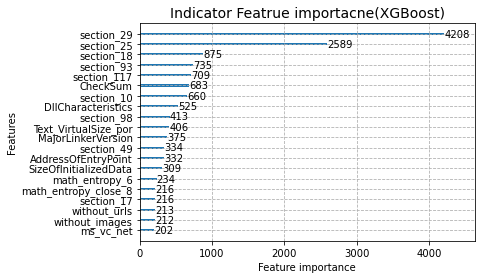

In [18]:
# feature importance
import matplotlib.pyplot as plt

print('Plotting feature importances...')
max_num_features=20     # 상위 N개의 feature 산출
ax = lgb.plot_importance(model,max_num_features=max_num_features) # plot_importance() : 피처 중요도 시각화 

plt.title("Indicator Featrue importacne(XGBoost)", size=14)
plt.rcParams["figure.figsize"] = (15,8) # 그래프의 가로 세로 인치
plt.grid(True, linestyle='--') # True = 그리드(표시선을 사용), linestyle = 표시선을 스타일 지정
plt.show()

In [19]:
#Train_dataset

In [20]:
#SHAP value 산출
explainer= shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(Train_dataset)
shap_values_normal = explainer.shap_values(Train_dataset_normal)
shap_values_malware = explainer.shap_values(Train_dataset_malware)
# pred_label = model.predict(Test_dataset)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [21]:
# SHAP 은 해당 Feature의 기여도를 확인하기 위하여 해당 feature가 없을 때 평균적인 변화를 통해 Shapley 값을 계산 함
print('np.shape(Train_dataset) :',np.shape(Train_dataset))
print('np.shape(shap_values) :',np.shape(shap_values)) 
# shape로 확인시 2개가 나온 이유는 label 값으로 2개(정상,악성)가 있기 때문
# 그래서 값을 확인해보면 정상일때와 악성일때의 shapley value는 정 반대의 값을 지님 (ex: -0.31 vs 0.31)

print('\n Train_dataset_shape_values[0]\n\n',shap_values[0])
print('\n Train_dataset_shape_values[1]\n\n',shap_values[1])

np.shape(Train_dataset) : (29130, 781)
np.shape(shap_values) : (2, 29130, 781)

 Train_dataset_shape_values[0]

 [[-0.00922487  0.19342478 -0.09146878 ...  0.03303167 -0.08733332
  -0.0479847 ]
 [-0.06312981  0.15049965 -0.09153508 ...  0.02417655 -0.05230905
  -0.15460854]
 [-0.26127849 -0.63865071 -0.14573401 ...  0.03189225 -0.02892063
  -0.12767182]
 ...
 [-0.0580983  -0.37522072 -0.03471854 ... -0.08133365 -0.07002031
  -0.04349483]
 [-0.38561368 -0.02167962 -0.09923521 ...  0.04115425 -0.08913635
  -0.04597857]
 [-0.11575996 -1.36386442  0.27843163 ...  0.07093402 -0.07793735
  -0.03664736]]

 Train_dataset_shape_values[1]

 [[ 0.00922487 -0.19342478  0.09146878 ... -0.03303167  0.08733332
   0.0479847 ]
 [ 0.06312981 -0.15049965  0.09153508 ... -0.02417655  0.05230905
   0.15460854]
 [ 0.26127849  0.63865071  0.14573401 ... -0.03189225  0.02892063
   0.12767182]
 ...
 [ 0.0580983   0.37522072  0.03471854 ...  0.08133365  0.07002031
   0.04349483]
 [ 0.38561368  0.02167962  0.099

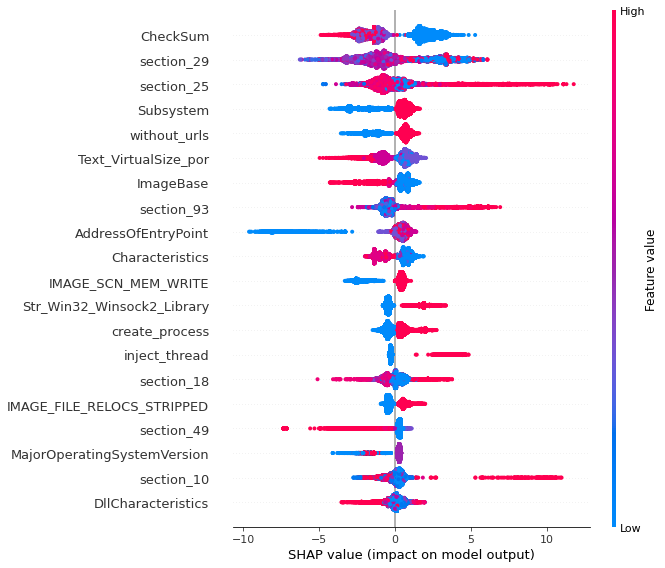

In [22]:
shap.summary_plot(shap_values[1], Train_dataset, plot_type = "dot" )  # 악성에 대한 shap_value

In [23]:
import numpy as np

feature_num=20

FI_df=pd.DataFrame()

cnt=[]
for i in range(feature_num):
    cnt.append(str(i))
    
FI_df['Num']=cnt

for label in range(2):
    # SHAP 상위 20개 feature 가져오기
    import_li=[]
    for i in shap_values[int(label)].T:  # feature 만큼 반복
        import_li.append(np.abs(i).mean(0))  # 해당 feature의 shapely 값의 절대값의 평균(feature_importance_vals)

    feature_importance = pd.DataFrame(list(zip(Features, import_li)), columns=['col_name','feature_importance_vals'])

    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    # feature_importance_vals을 기준으로 내림차순으로 정렬 = 기여도가 높은 feature 순으로 정렬
    FI_df[label]=list(feature_importance['col_name'].head(feature_num))
    # shap 값이 높은 상위 20개의 feature를 뽑아냄 = feature selection

In [24]:
#print(np.shape(shap_values))  
# shap 값이 2개인 이유는 이진 분류기를 사용했기 때문임 하나는 0(정상)으로 관여한 shap 값, 다른 하나는 1(악성)으로 관여한 shap 값
# 이기때문에 값이 정반대를 나타냄 ()

#print(np.shape(shap_values[0]))
#print(np.shape(shap_values[0].T))

#print(shap_values[0].T)
#print(np.abs(shap_values[0].T))
#print(np.abs(shap_values[0].T).mean(0))

#feature_importance
FI_df
# 어처피 label에 따른 shapley 값은 부등호 차이임으로 abs(절대 값)을 해줬기에 상위 Fl feature 값은 동일하다 

,Num,0,1
0,0,CheckSum,CheckSum
1,1,section_29,section_29
2,2,section_25,section_25
3,3,Subsystem,Subsystem
4,4,without_urls,without_urls
5,5,Text_VirtualSize_por,Text_VirtualSize_por
6,6,ImageBase,ImageBase
7,7,section_93,section_93
8,8,AddressOfEntryPoint,AddressOfEntryPoint
9,9,Characteristics,Characteristics


In [25]:
# list(feature_importance['col_name'].head(20))

In [26]:
label_0_selected_feature_list=[]
# selFeatures=list(feature_importance['col_name'].head(feature_num))
selFeatures=['Subsystem', 'without_urls', 'ImageBase', 'Characteristics', 'IMAGE_SCN_MEM_WRITE',
'Str_Win32_Winsock2_Library', 'create_process', 'inject_thread', 'IMAGE_FILE_RELOCS_STRIPPED', 'section_49']

# 선택된 10개의 feature들
# 해당 feature 가 선택된 이유는 또 다른 코드에서 Dos 를 판단하기 위해 사용 되는 feature 이기 때문이다 

for i in selFeatures:
    for idx, f_name in zip(feature_importance.head(feature_num).index, feature_importance['col_name'].head(feature_num)):
        if i == f_name:
            label_0_selected_feature_list.append(idx)
# label_0_selected_feature_list : 선택된 feature의 index 저장

In [27]:
label_0_selected_feature_list

[10, 744, 12, 14, 36, 772, 692, 714, 21, 598]

In [28]:
# label_0_selected_feature_list = list(feature_importance['col_name'].head(10).index) 
label_1_selected_feature_list = label_0_selected_feature_list

label_0_selected_feature_str = ",".join([str(i) for i in label_0_selected_feature_list]) # 리스트 내의 index -> string 으로
label_1_selected_feature_str = ",".join([str(i) for i in label_1_selected_feature_list])
select_featuare_str=",".join([str(i) for i in selFeatures]) # 리스트 내의 feature 이름 -> stirng 으로


with open(output_path+'input_parameters.txt','w') as f:
    f.write(label_0_selected_feature_str)
    f.write("\n")
    f.write(label_1_selected_feature_str)
    f.write("\n")
    f.write(select_featuare_str)
    f.write("\n")
    f.write(model_name)
    
# 파일 형태로 선택된 feature의 index 번호, 이름, 모델이름을 저장

In [29]:
#FI_df

In [30]:
#shap.summary_plot(shap_values[1], Train_dataset, plot_type = "dot" , feature_names = Features)
#shap.summary_plot(shap_values[2], Train_dataset, plot_type = "dot" , feature_names = Features)
#shap.summary_plot(shap_values[3], Train_dataset, plot_type = "dot" , feature_names = Features)

In [31]:
# CDF 작업

In [39]:
class_type= 1 # 0: Normal / 1: Malware

# 각 라벨에 대응되는 라벨별 shap 데이터 셋으로 진행 
if class_type== 0:
    shap_df = pd.DataFrame(shap_values_normal[0]) # (11568,781)
    shap_df.columns = Features
    select_feature_li=selFeatures
    select_feature_shap_li=[]
    for i in select_feature_li:
        select_feature_shap_li.append(i+ '_SHAP')
        
    feature_names = select_feature_li # selFeatures(앞서 선택된 10개의 feature)
    feature_names_shap = select_feature_shap_li # selFeatures의 각각의 feature에 '_SHAP' 붙인 list

    shap_df = shap_df[feature_names] # 선택된 10개의 feature SHAP 만 사용하는 df 뽑아냄
    shap_df.columns = feature_names_shap # 뽑아낸 df의 속성명을 뒤에 '_SHAP' 붙인걸로 변환
    

    select_feature = Train_dataset_normal[feature_names] # 선택된 10개의 Ori_Value를 추출
    select_feature_shap_col=[]
    #즉, shap_df는 선택된 feature 10개의 shap 값, select_feature는 선택된 feature 10개의 실제 값
    
    for i, j in zip(select_feature_li, select_feature_shap_li):
        select_feature_shap_col.append(i)
        select_feature_shap_col.append(j)
    # select_feature_shap_col : feature이름 과 feature이름_SHAP 을 합친 것 
    
    select_feature = select_feature.join(shap_df) # 기본 값10개 + shap 값10개 합침  -> 기,기...기,shap,shap...shap
    select_feature = select_feature.reindex(columns=select_feature_shap_col) # 위 값을 같은 feature끼리 정렬 -> 기,shap,기,shap...


    #train_real_label = pd.DataFrame(train_real_label) # 원래 코드
    train_real_label = pd.DataFrame(train_normal_label) # 수정 코드 select_feature은 11568개 지만 train_real_label는 29130로 다름
    train_real_label.columns = ['train_real_label'] # feature 이름을 'train_real_label'로 지정 
    
    global_feature = select_feature
    global_feature = global_feature.join(train_real_label)
    
    # ? 이거 마지막에 real_label 붙은게 안 맞는데?? normal 데이터 셋을 기준으로 사용해서 11568줄인데 label은 29130으로 다른 값이
    # 배치됨.. ex) label이 0인값을 잘라낸데이터 셋인데, 뒤에 train_real_label으로 label이 1인게 붙어있음... (원래는 다 0이 정상)

    
    
elif class_type== 1 : # 위와 동일한 과정을 malware 데이터셋으로 진행, normal의 shap는 0번째, malware의 shap는 1번째 value로
    shap_df = pd.DataFrame(shap_values_malware[1]) # (17562,781)
    shap_df.columns = Features
    select_feature_li=selFeatures
    select_feature_shap_li=[]
    for i in select_feature_li:
        select_feature_shap_li.append(i+ '_SHAP')
               
    feature_names = select_feature_li
    feature_names_shap = select_feature_shap_li

    shap_df = shap_df[feature_names]
    shap_df.columns = feature_names_shap

    select_feature = Train_dataset_malware[feature_names]

    select_feature_shap_col=[]
    for i, j in zip(select_feature_li, select_feature_shap_li):
        select_feature_shap_col.append(i)
        select_feature_shap_col.append(j)

    select_feature = select_feature.join(shap_df)
    select_feature=select_feature.reindex(columns=select_feature_shap_col)
    

    #train_real_label = pd.DataFrame(train_real_label) # 원래 코드
    train_real_label = pd.DataFrame(train_malware_label) # 수정 코드 코드
    train_real_label.columns = ['train_real_label'] 

    
    global_feature = select_feature
    global_feature = global_feature.join(train_real_label) 
    
    

In [40]:
global_feature

,Subsystem,Subsystem_SHAP,without_urls,without_urls_SHAP,ImageBase,ImageBase_SHAP,Characteristics,Characteristics_SHAP,IMAGE_SCN_MEM_WRITE,IMAGE_SCN_MEM_WRITE_SHAP,...,Str_Win32_Winsock2_Library_SHAP,create_process,create_process_SHAP,inject_thread,inject_thread_SHAP,IMAGE_FILE_RELOCS_STRIPPED,IMAGE_FILE_RELOCS_STRIPPED_SHAP,section_49,section_49_SHAP,train_real_label
0,3,0.426939,1,0.711139,5,-2.043384,1,0.632484,1,0.616174,...,2.069693,0,-0.477283,0,-0.269024,0,-0.367641,0.0,0.354618,1
1,3,0.728945,1,0.746974,1,1.170792,1,1.356105,1,0.563407,...,-0.382306,0,-0.222160,0,-0.273715,1,0.445554,0.0,0.309262,1
2,3,0.997338,1,0.680885,5,-0.950857,4,-0.633353,1,0.578942,...,-0.458302,1,1.681240,0,-0.261119,0,-0.295532,0.0,0.311070,1
3,3,0.770149,0,-1.669471,1,0.522889,1,0.805331,1,0.419301,...,2.667283,1,0.591263,0,-0.297256,0,-0.376058,0.0,0.271980,1
4,3,0.707021,1,0.610823,1,0.202533,1,0.432007,1,0.387230,...,-0.531052,1,0.437073,0,-0.254954,1,0.458341,0.0,0.291639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,3,0.709261,1,1.218510,1,1.213297,1,1.035859,0,-2.055866,...,-0.333855,0,-0.805915,0,-0.289785,0,-0.378016,0.0,0.281656,1
17558,3,0.257289,1,0.942030,4,-0.347080,1,0.882147,1,0.566107,...,1.366257,1,0.416675,1,4.093526,0,-0.322996,0.0,0.432687,1
17559,3,0.766024,0,-1.376180,1,0.393345,3,0.339740,1,0.513059,...,2.478669,1,0.545990,0,-0.280021,1,0.789376,0.0,0.272041,1
17560,3,1.142348,1,0.887946,1,1.424475,1,0.909956,0,-1.993086,...,-0.360031,0,-0.665025,0,-0.266839,0,-0.392598,0.0,0.296289,1


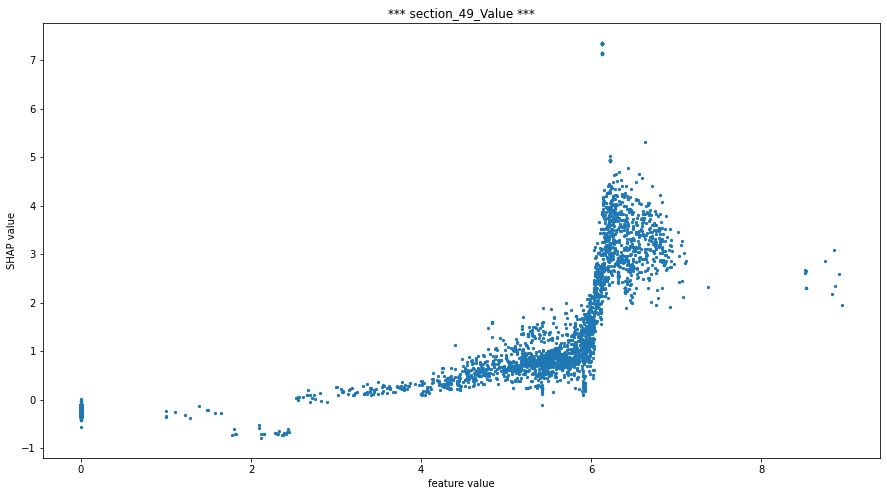

In [34]:
    df=pd.DataFrame()
    
        
    df['section_49_Value']=global_feature['section_49']
    df['section_49_SHAP']=global_feature['section_49_SHAP']

    df_sort=df.sort_values(by='section_49_SHAP', ascending=True) # df_sort : df를 shap 기준으로 오름차순으로 정렬

    plt.scatter(df['section_49_Value'], df['section_49_SHAP'],s=5) # x축 shap, y축 cdf

    # title
    plt.title('*** section_49_Value ***')
    # label
    plt.xlabel('feature value')
    plt.ylabel('SHAP value')
    # show
    plt.show()

    print()

In [35]:
file_df=global_feature

not_feature_li=['Unnamed: 0','predict_label', 'train_real_label']
feature_li=[]
for i in file_df.columns:
    if i not in not_feature_li:
        if i.split('_SHAP')[0] not in feature_li:
            feature_li.append(i.split('_SHAP')[0])
    # _SHAP가 붙은 feature와 not_feature_li에 속하는 feature를 제외함 (처음에 선택된 10개의 feature)

print(feature_li)

['Subsystem', 'without_urls', 'ImageBase', 'Characteristics', 'IMAGE_SCN_MEM_WRITE', 'Str_Win32_Winsock2_Library', 'create_process', 'inject_thread', 'IMAGE_FILE_RELOCS_STRIPPED', 'section_49']


In [36]:
# CDF 저장을 위한 데이터프레임
df_CDF=pd.DataFrame()
# Global 분석을 위해 값을 저장할 데이터프레임
df_global=pd.DataFrame()

In [37]:
def DataFrame(file_df, featureName): 
# file_df에 있는 featureName 속성의 Org_value와 SHAP으로 구성된 DF와 해당 Feature의 Org_val과 SHAP 값의 최대,최소 값 반환 
    feature_value_col=featureName+'_Org'    
    SHAP_value_col=featureName+'_SHAP'     

    df=pd.DataFrame()
    df[featureName+'_Org']=file_df[featureName]   # 기존 file_df의 실제 feature 값
    df[featureName+'_SHAP']=file_df[featureName+'_SHAP']# 기존 file_df의 feature의 shap 값

    # feature 최대/최소
    feature_max=max(df[feature_value_col])
    feature_min=min(df[feature_value_col])

    # SHAP 최대/최소
    SHAP_max=max(df[SHAP_value_col])
    SHAP_min=min(df[SHAP_value_col])
    
    # 지정한 Feature 의 value와 SHAP 로만 구성된 데이터 프레임과 Feature value와 SHAP의 최대,최소 값을 반환

    return df, feature_max, feature_min, SHAP_max, SHAP_min

def CDFgraph(SHAP_li, CDF_li, featureName): 
    # SHAP 기반 CDF 그래프 그리기
    temp_list = []
    df=pd.DataFrame()
    
    for i in range(len(SHAP_li)):
        temp_list.append(SHAP_li[i][1])
        
    df[featureName+'_SHAP']=temp_list 
    #df[featureName+'_SHAP']=SHAP_li
    df[featureName+'_CDF']=CDF_li

    df_sort=df.sort_values(by=featureName+'_SHAP', ascending=True) # df_sort : df를 shap 기준으로 오름차순으로 정렬

    plt.plot(df_sort[featureName+'_SHAP'], df_sort[featureName+'_CDF']) # x축 shap, y축 cdf

    # title
    plt.title('*** '+featureName+' ***')
    # label
    plt.xlabel('feature value')
    plt.ylabel('SHAP value')
    # show
    plt.show()

    print()

In [61]:
print(np.shape(df_sort))
print(len(set_feature))
data_li
#range_li

NameError: name 'df_sort' is not defined

In [ ]:
all_range_li

In [38]:
# feature_li : 선택된 10개의 Feature 이름
# file_df : 선택된 featrue의 Org_value, SHAP 와 train_real_label로 구성된 데이터 프레임 
# df_sort : df를 feature value를 기준으로 오름차순을 정렬
# set_feature : df_sort에서 중복된 값을 제거한 리스트
# data_li : feature value와 해당 feature value를 지니는 데이터 의 수로 구성된 리스트


all_range_li=[]
set_all_range_li=[]
for featureName in feature_li:
    df, feature_max, feature_min, SHAP_max, SHAP_min=DataFrame(file_df, featureName)
    df_sort=df.sort_values(by=featureName+'_Org', ascending=True)
    # 선택된 Feature만 이루어진 df를 Org(=Feature value)를 기준으로 오름차순으로 정렬
    
    data_li=[]        # 전체 feature value 종류 및 각각의 feature에 해당하는 파일 개수 저장을 위한 list
    range_li=[]
    range_data_li=[]
    

    set_feature=set(list(df_sort[featureName+'_Org'].values))
    # set() : 리스트 내에있는 중복인 값을 제거하는 함수 (즉, 중복된 값을 지니는 Feature value 삭제)
    
    
    # sorted() : 오름차순으로 정렬 
    for i in sorted(list(set_feature)):
        instance_num=[]                    # 각 feature value 및 개수 저장할 list
        instance_num.append(i)             # feature value 저장
        instance_num.append(list(df_sort[featureName+'_Org'].values).count(i)) 
        # 즉, instance_num은 feature value 값과 해당 feature value에 해당되는 데이터가 몇개인지를 담아두는 temp 역할 
        data_li.append(instance_num)
    #print(data_li)
    
    # 데이터 수=range_size인 경우의 range 작업
    if len(set_feature) > 10:
        range_size = 1000
        tmp = 0
        for i in data_li:
            tmp += i[1]  # 해당 feature에 해당되는 데이터 개수
            if tmp >= range_size:
                range_li.append(i[0]) # 누적된 데이터 크기가 1000 이상이면 해당 value 값 저장
                tmp = 0
            if i[1] >=range_size: # 처음 부터 해당 value에 속하는 데이터의 수가 1000 이상이면
                range_li.pop(-1) 
                range_li.append([i[0],2]) 
                # 리스트 형태로 넣어줌 일종의 표시?
                tmp = 0  
        
        if type(range_li[-1]) == type([]):
            if range_li[-1][0] != data_li[-1][0]:
                range_li.append(data_li[-1][0]) 
        else:
            if range_li[-1] != data_li[-1][0]:
                range_li.append(data_li[-1][0])
        # range_li 작업이 끝났을 때 마지막으로 적힌게 data_li의 마지막 요소가 아니라면 data_li의 마지막 요소 추가
                
        range_li.insert(0 ,-0.1)
        # 이건 왜 넣는거지? 처음알려줄려고 넣는건가?
    
    else: # feature value 종류가 10개가 안된다면 그냥 추가?
        for k in set_feature:
            range_li.append(k)
            range_li=sorted(range_li)
            
    
    #print("**** range_li ****")
    #print(range_li)
    #print("**** ****")
    set_all_range_li.append(set_feature) # 선택된 모든 feature에 대하여 각 feature가 지니는 feature value를 저장
    all_range_li.append(range_li) # 선택된 모든 feature에 대한 range_li를 저장

In [63]:
# 범위 최대값 저장 구간
range_max=[]   

for range_con in all_range_li:
    #print(range_con)
    tmp=0
    for i in range(len(range_con)-1):
        if type(range_con[i])!=list and type(range_con[i+1])==list: # 중간에 리스트 값이 포함 되어 있는 경우 여기서는 'section_49'
            tmp+=1
    range_max.append(len(range_con)+tmp)
    
range_max=max(range_max)
#print(range_max)

# range_max : 선택된 feature중 범위가 가장 다양한 feature의 범위수 

In [64]:
#range_max=[]   

#for range_con in all_range_li:
    #print(range_con)
    #tmp=0
    #for i in range(len(range_con)-1):
        #if type(range_con[i])!=list and type(range_con[i+1])==list: 
            #tmp+=1
    #range_max.append(len(range_con)+tmp)

#print('\n',range_max)
#range_max=max(range_max)
#print(range_max)


In [65]:
set_all_range_li

[{1, 2, 3, 4},
 {0, 1},
 {1, 2, 3, 4, 5},
 {1, 2, 3, 4, 5},
 {0, 1},
 {0, 1},
 {0, 1},
 {0, 1},
 {0, 1},
 {0.0,
  1.0,
  1.578188677,
  1.776483229,
  2.096341484,
  2.286395403,
  2.317637071,
  3.0,
  3.363834636,
  4.026816046,
  4.197086442,
  4.333510171,
  4.374680579,
  4.449322529,
  5.008865899,
  6.004781801,
  6.693470735,
  8.52023534,
  4.684128375,
  5.990371507,
  5.023035811,
  5.272547691,
  5.486198457,
  5.61989208,
  5.499553182,
  5.803536936,
  5.484089251,
  6.031874668,
  6.070288925,
  6.249159276,
  6.261098554,
  6.275586804,
  6.325881267,
  6.410020605,
  6.524037174,
  5.18860742,
  5.971882034,
  6.758923492,
  4.1416093,
  4.392943992,
  4.451133258,
  5.077425229,
  5.121122332,
  5.657260928,
  5.516963839,
  5.627227831,
  5.316304863,
  5.288712882,
  5.413536365,
  6.003537701,
  6.013638375,
  6.115290832,
  6.133795424,
  6.200449604,
  6.225724762,
  6.230545256,
  6.460271857,
  4.667523292,
  4.841573579,
  4.870205516,
  5.874442085,
  5.50783

------- Subsystem --------

[1, 2, 3, 4]
***** 1 ~ 1 구간 ******
 - 평균 :  4.2440764589971645
 - 표준편차 :  0.0
 - 데이터 개수 :  3


invalid value encountered in double_scalars


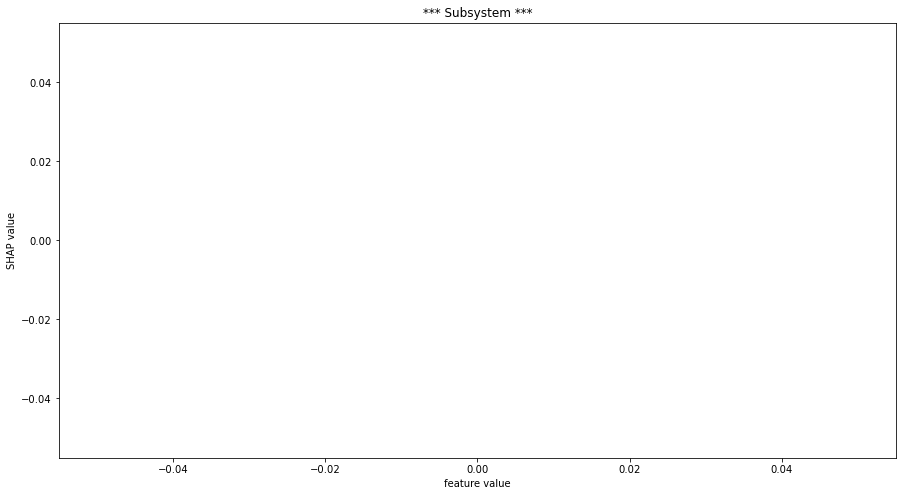


***** 2 ~ 2 구간 ******
 - 평균 :  2.338869176458504
 - 표준편차 :  0.8038745172347611
 - 데이터 개수 :  5238


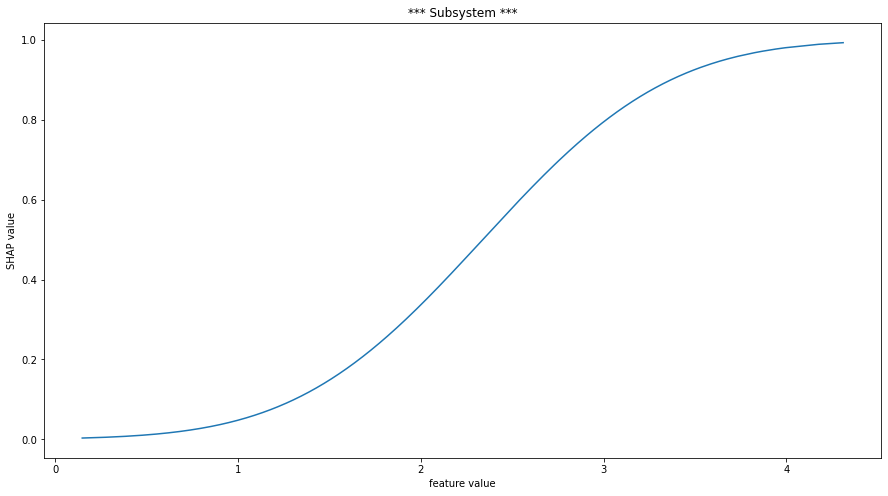


***** 3 ~ 3 구간 ******
 - 평균 :  -0.49576094106263413
 - 표준편차 :  0.23221499310274443
 - 데이터 개수 :  6306


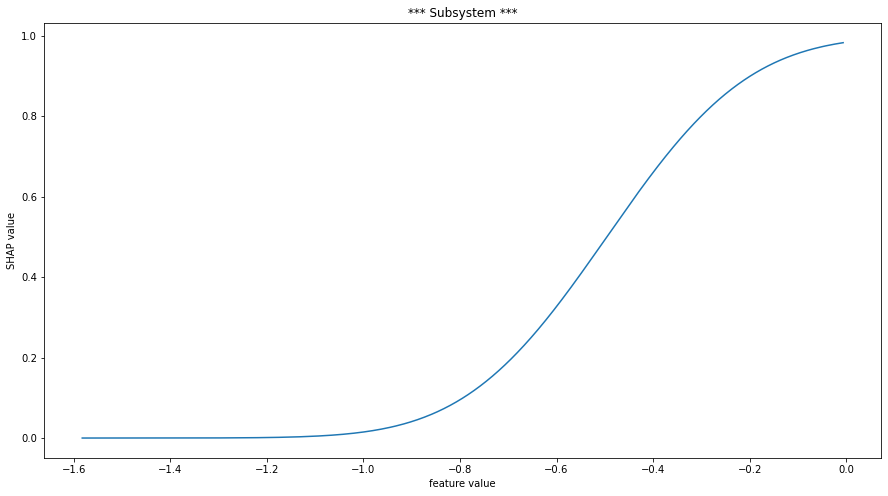


***** 4 ~ 4 구간 ******
 - 평균 :  1.5376269686147477
 - 표준편차 :  0.4711628194373847
 - 데이터 개수 :  21


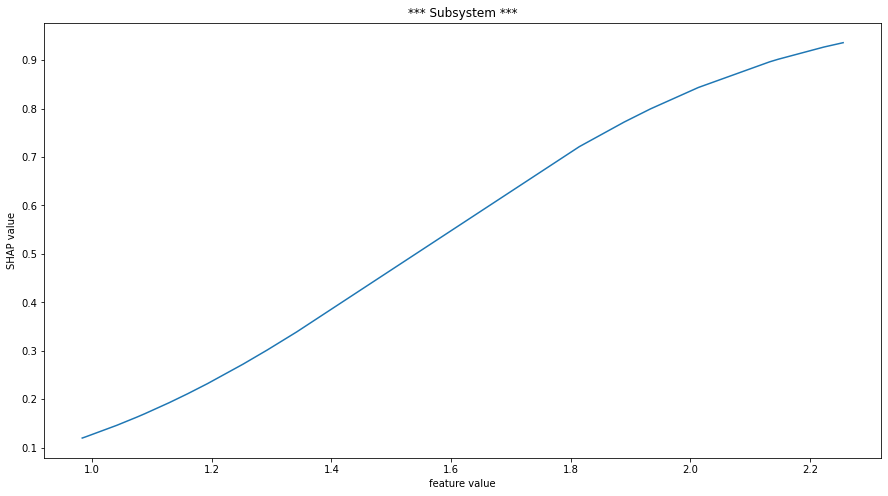



------- without_urls --------

[0, 1]
***** 0 ~ 0 구간 ******
 - 평균 :  1.5520799173736408
 - 표준편차 :  0.4747159154901103
 - 데이터 개수 :  6234


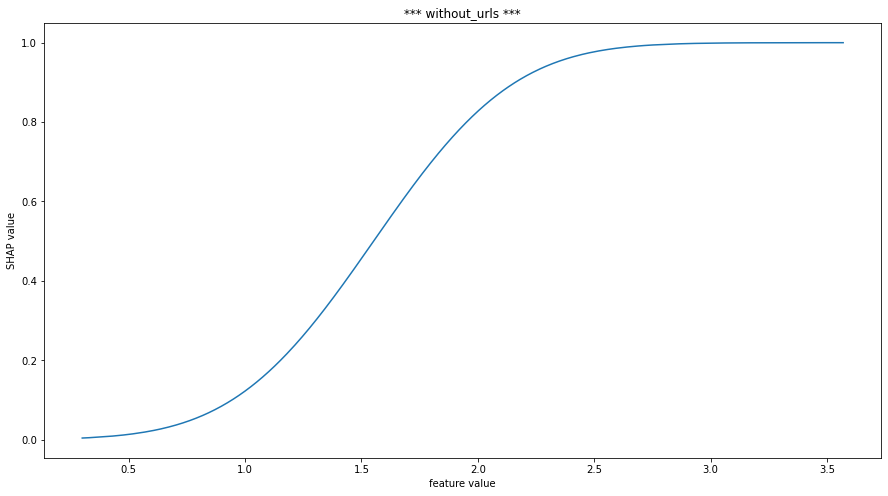


***** 1 ~ 1 구간 ******
 - 평균 :  -0.5041548533951579
 - 표준편차 :  0.15406736002626176
 - 데이터 개수 :  5334


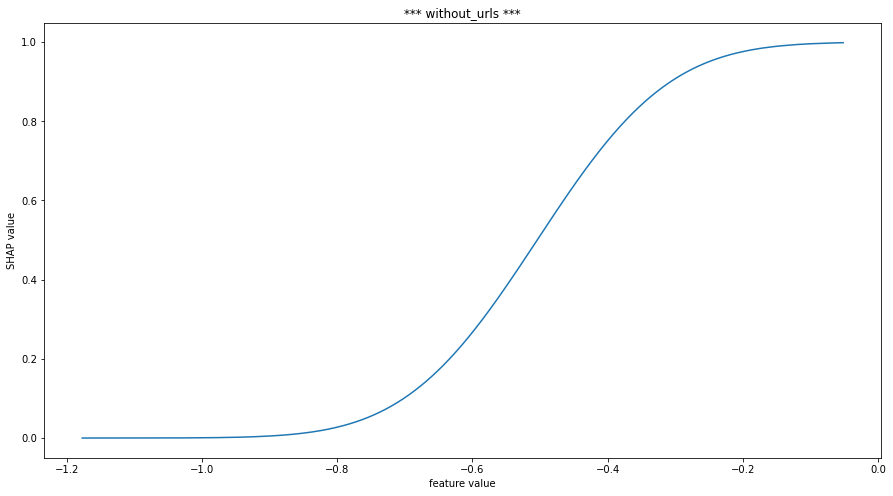



------- ImageBase --------

[1, 2, 3, 4, 5]
***** 1 ~ 1 구간 ******
 - 평균 :  -0.6507723020145314
 - 표준편차 :  0.28247652626684155
 - 데이터 개수 :  5820


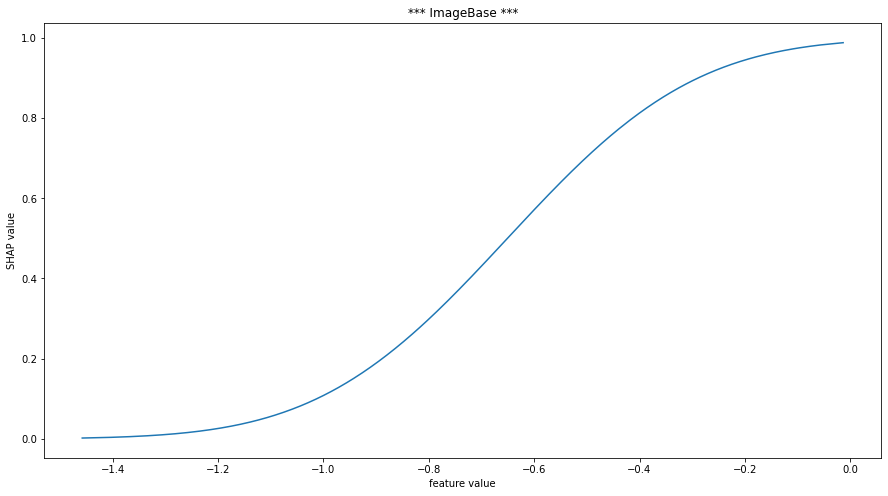


***** 2 ~ 2 구간 ******
 - 평균 :  -0.4114689287035351
 - 표준편차 :  0.25417998717773793
 - 데이터 개수 :  132


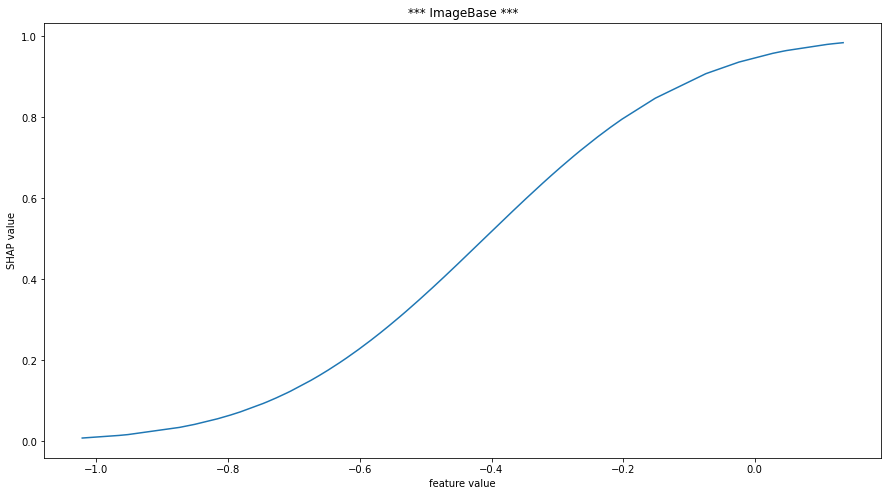


***** 3 ~ 3 구간 ******
 - 평균 :  -0.5042212434055542
 - 표준편차 :  0.0956674723161086
 - 데이터 개수 :  4


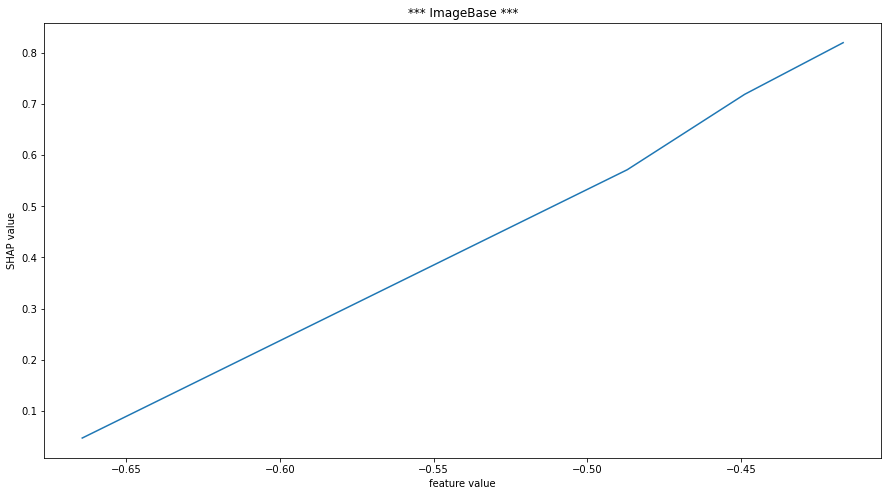


***** 4 ~ 4 구간 ******
 - 평균 :  0.40096777660296423
 - 표준편차 :  0.22352373497133987
 - 데이터 개수 :  535


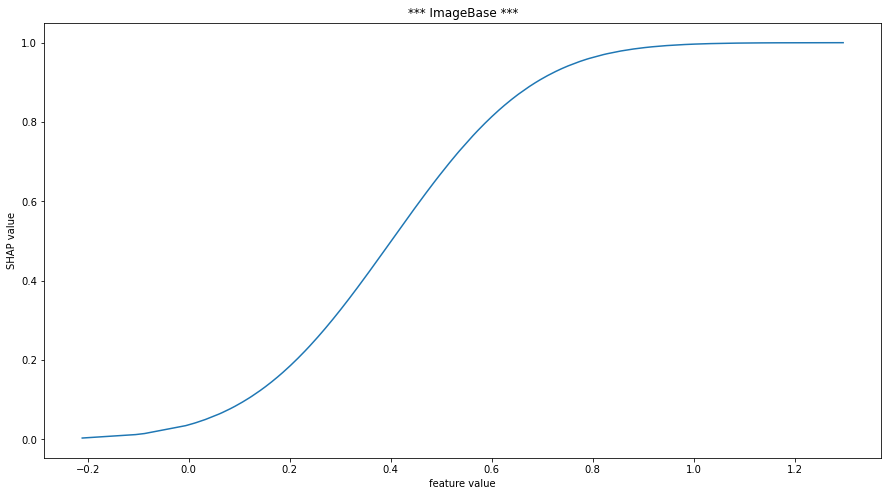


***** 5 ~ 5 구간 ******
 - 평균 :  2.0071924466075504
 - 표준편차 :  0.6270107095500683
 - 데이터 개수 :  5077


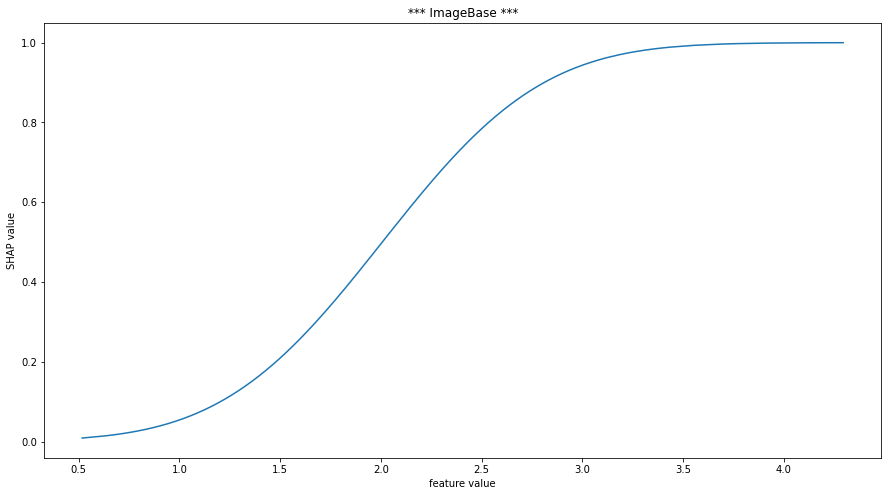



------- Characteristics --------

[1, 2, 3, 4, 5]
***** 1 ~ 1 구간 ******
 - 평균 :  -0.6290588313320785
 - 표준편차 :  0.23120351653528545
 - 데이터 개수 :  3524


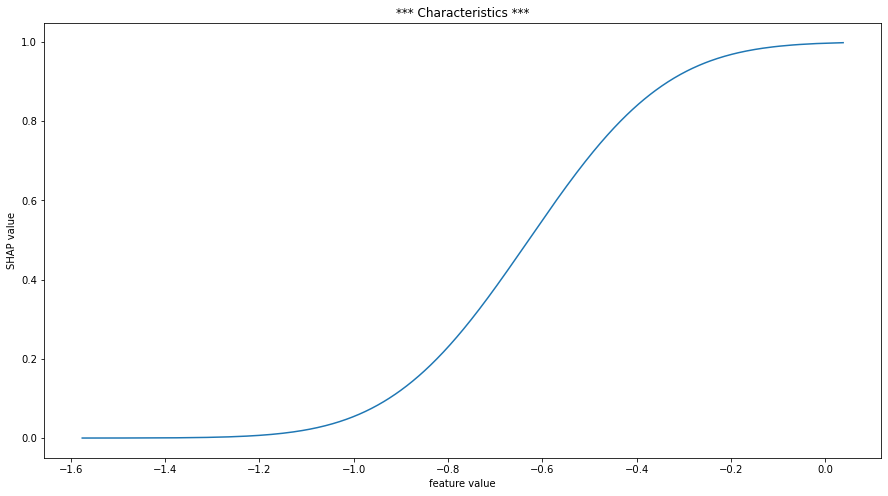


***** 2 ~ 2 구간 ******
 - 평균 :  -0.3181434851518321
 - 표준편차 :  0.2762431747870966
 - 데이터 개수 :  78


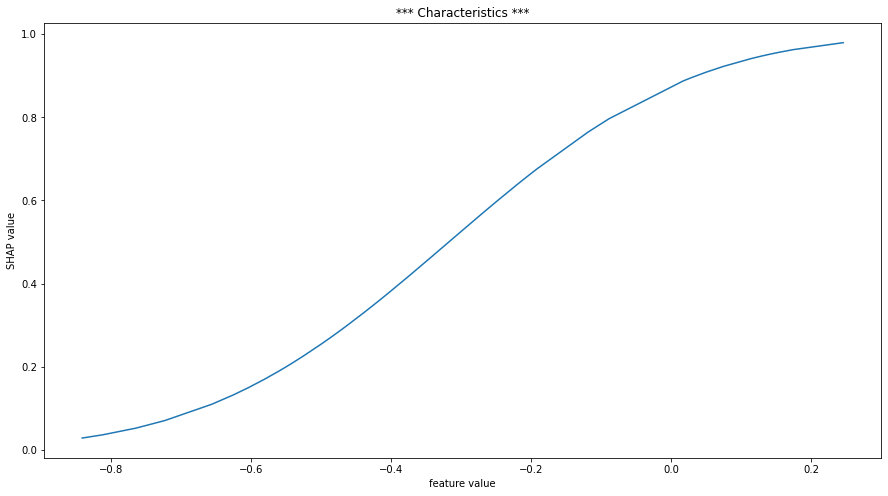


***** 3 ~ 3 구간 ******
 - 평균 :  -0.32016038152959786
 - 표준편차 :  0.19999021848243148
 - 데이터 개수 :  218


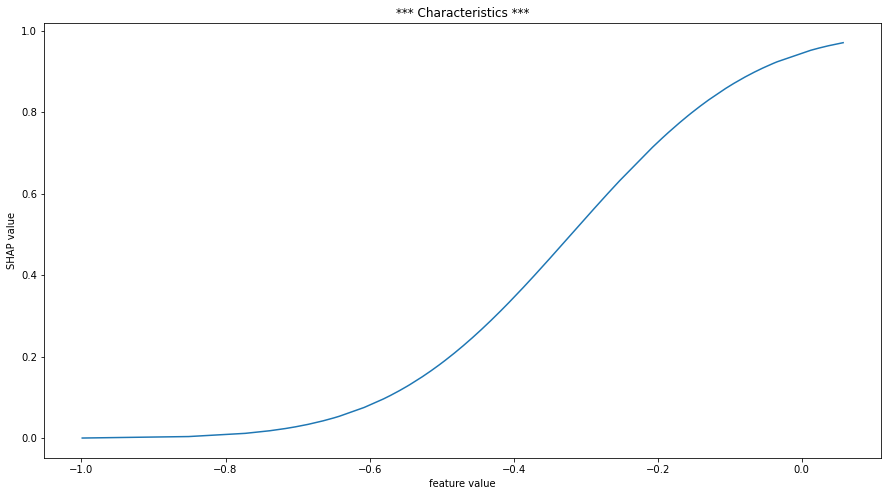


***** 4 ~ 4 구간 ******
 - 평균 :  1.119621554842845
 - 표준편차 :  0.24625400065739872
 - 데이터 개수 :  6594


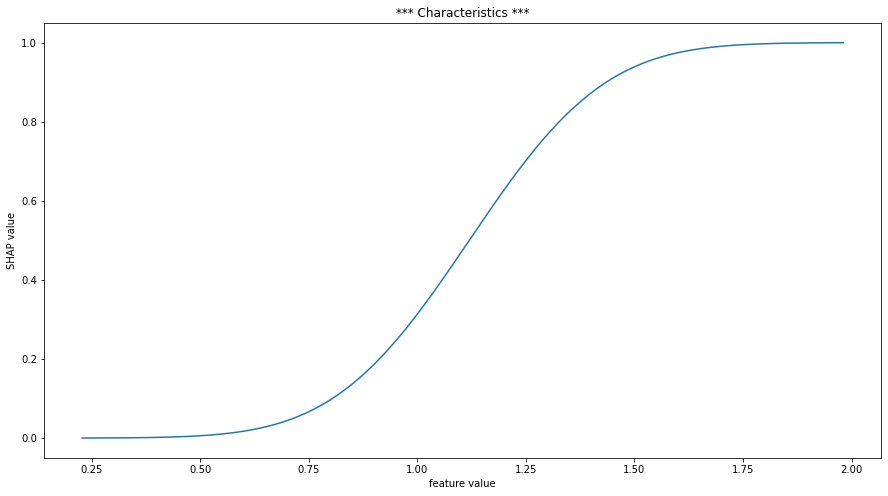


***** 5 ~ 5 구간 ******
 - 평균 :  1.0552025544812862
 - 표준편차 :  0.3825832530487575
 - 데이터 개수 :  1154


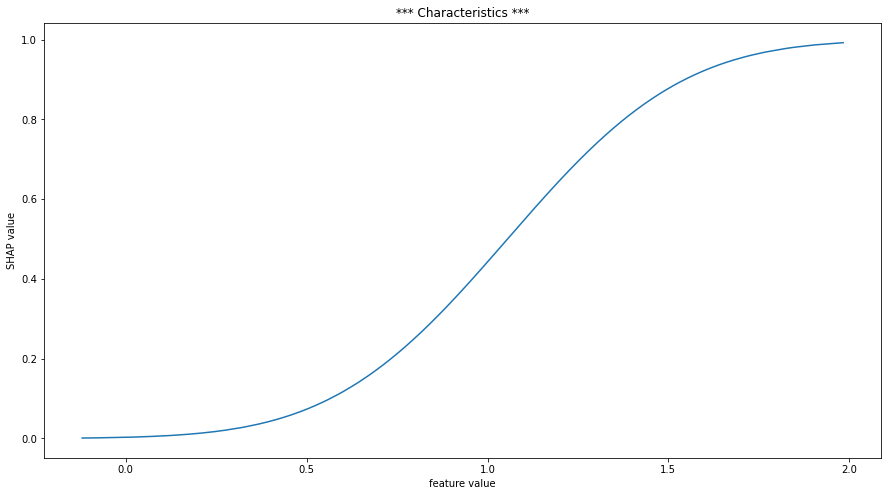



------- IMAGE_SCN_MEM_WRITE --------

[0, 1]
***** 0 ~ 0 구간 ******
 - 평균 :  2.429589688216876
 - 표준편차 :  0.2356143564199106
 - 데이터 개수 :  4507


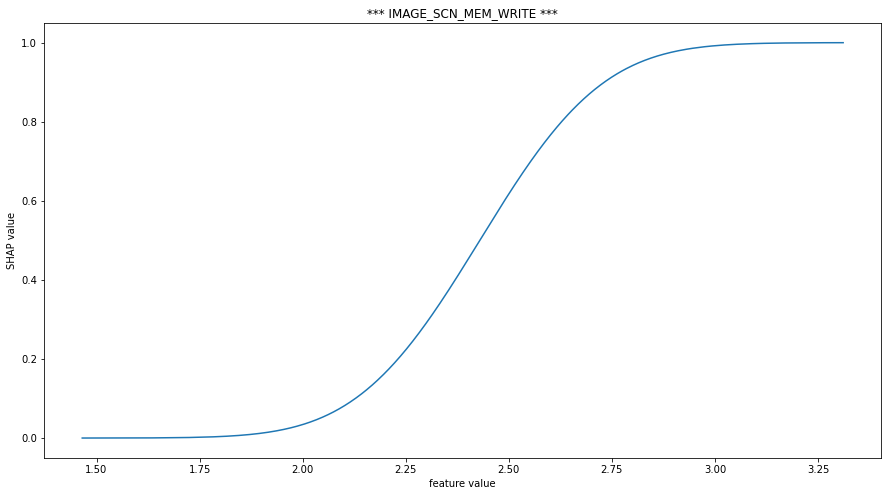


***** 1 ~ 1 구간 ******
 - 평균 :  -0.330063491652692
 - 표준편차 :  0.1150335859795827
 - 데이터 개수 :  7061


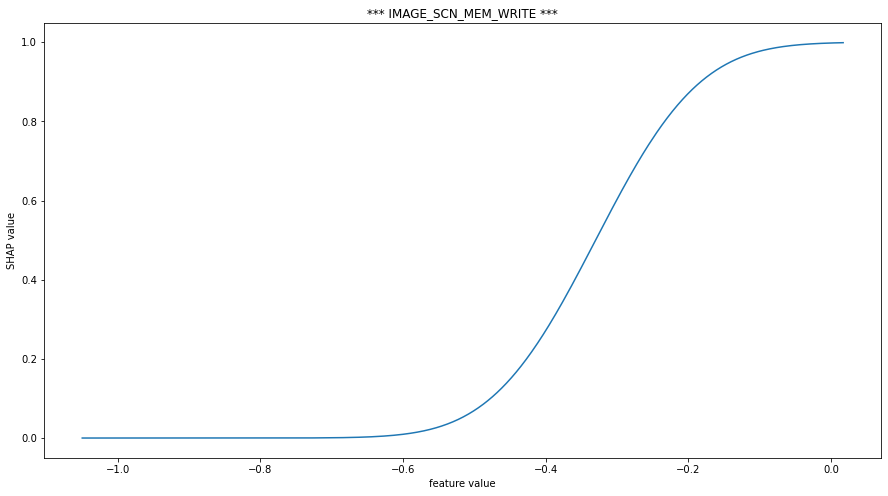



------- Str_Win32_Winsock2_Library --------

[0, 1]
***** 0 ~ 0 구간 ******
 - 평균 :  0.5095917749534958
 - 표준편차 :  0.10215806274855489
 - 데이터 개수 :  10799


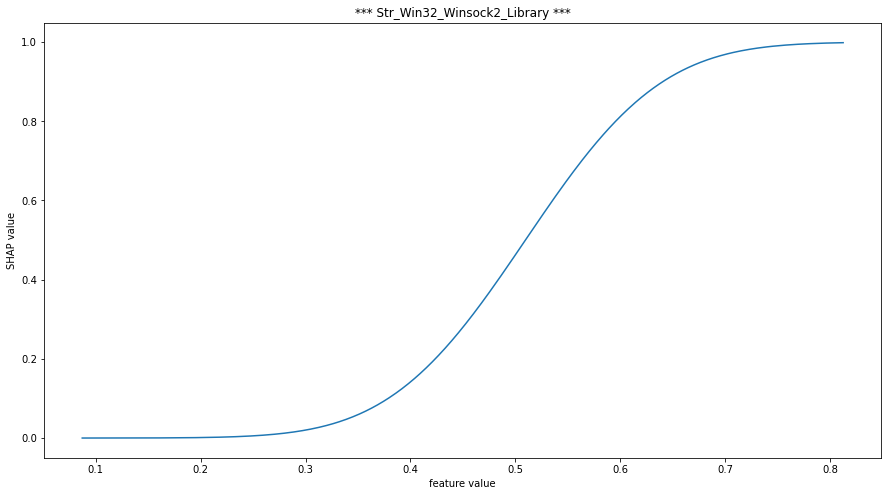


***** 1 ~ 1 구간 ******
 - 평균 :  -1.5516774908537978
 - 표준편차 :  0.47379815759786875
 - 데이터 개수 :  769


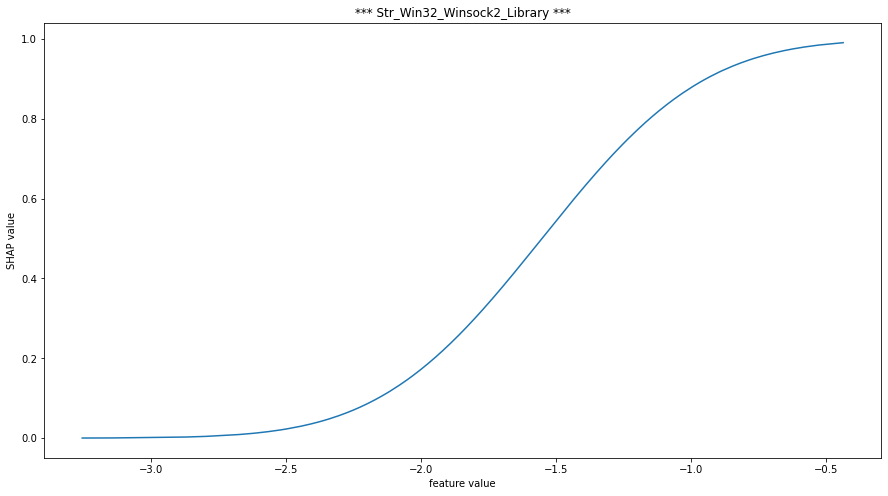



------- create_process --------

[0, 1]
***** 0 ~ 0 구간 ******
 - 평균 :  0.5677293890494765
 - 표준편차 :  0.19112925180010032
 - 데이터 개수 :  8201


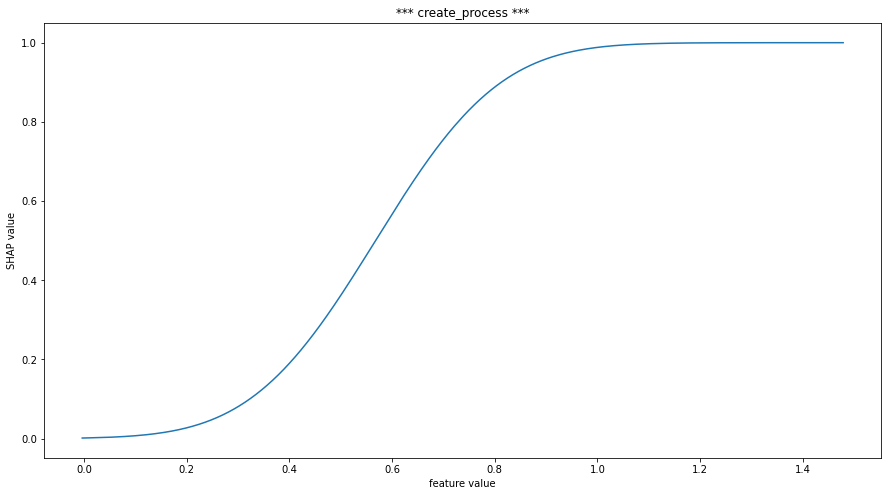


***** 1 ~ 1 구간 ******
 - 평균 :  -0.4270195925907078
 - 표준편차 :  0.25842257054312756
 - 데이터 개수 :  3367


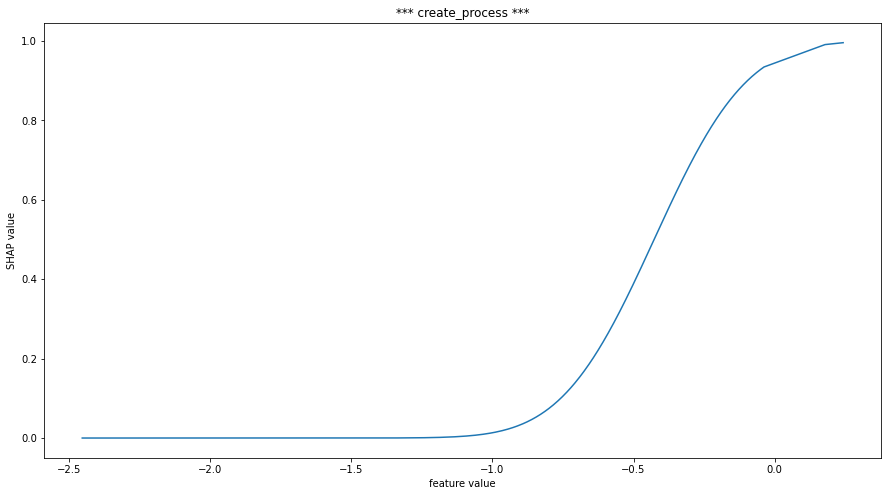



------- inject_thread --------

[0, 1]
***** 0 ~ 0 구간 ******
 - 평균 :  0.31545035014829687
 - 표준편차 :  0.027207074991486804
 - 데이터 개수 :  11537


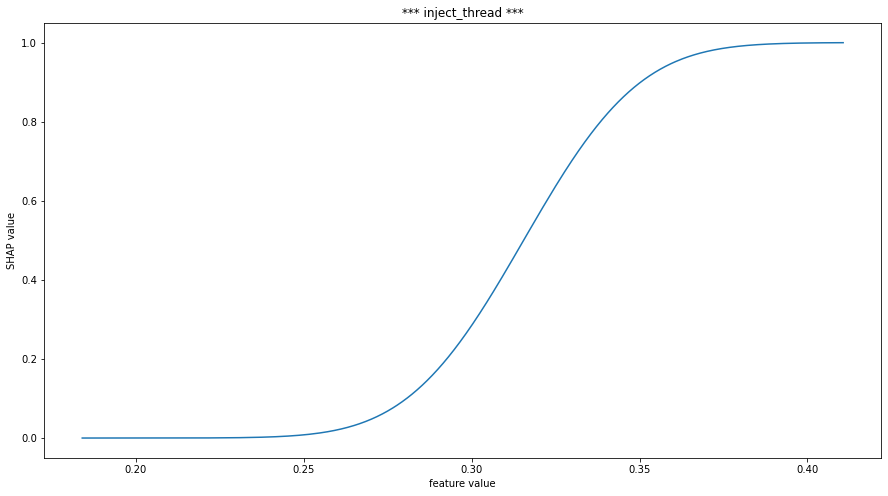


***** 1 ~ 1 구간 ******
 - 평균 :  -3.138594283402409
 - 표준편차 :  0.6508567225226025
 - 데이터 개수 :  31


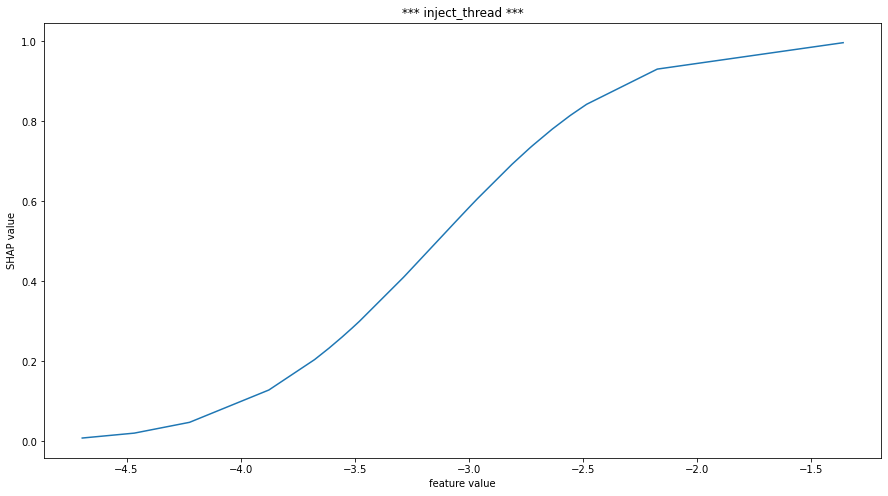



------- IMAGE_FILE_RELOCS_STRIPPED --------

[0, 1]
***** 0 ~ 0 구간 ******
 - 평균 :  0.4769529107649336
 - 표준편차 :  0.0930869652755211
 - 데이터 개수 :  9540


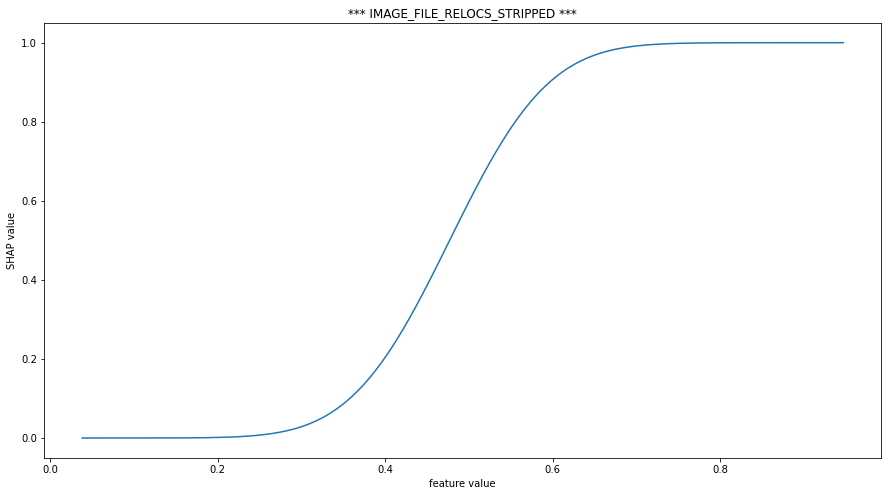


***** 1 ~ 1 구간 ******
 - 평균 :  -0.44898285621607853
 - 표준편차 :  0.12346879257339612
 - 데이터 개수 :  2028


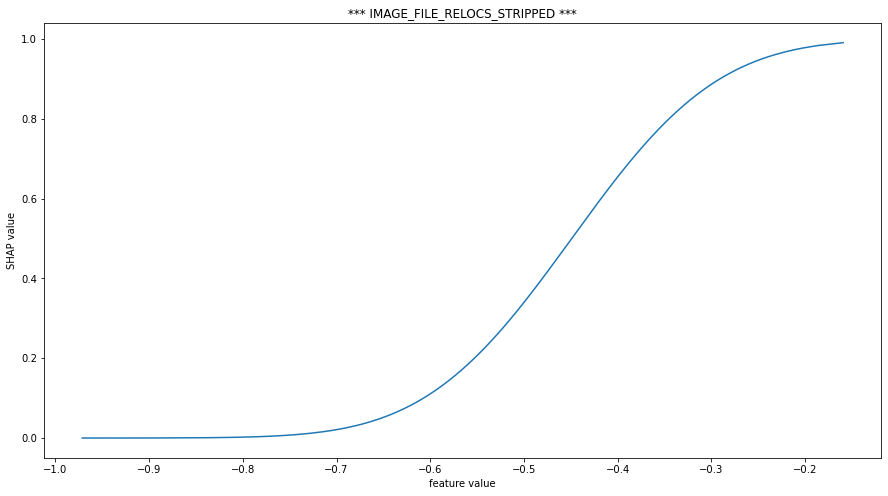



------- section_49 --------

[-0.1, [0.0, 2], 5.53217382, 6.171048703, 8.946513251]
***** -0.1 ~ -0.1 구간 ******
 - 평균 :  nan
 - 표준편차 :  nan
 - 데이터 개수 :  0


Mean of empty slice.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in true_divide
invalid value encountered in double_scalars


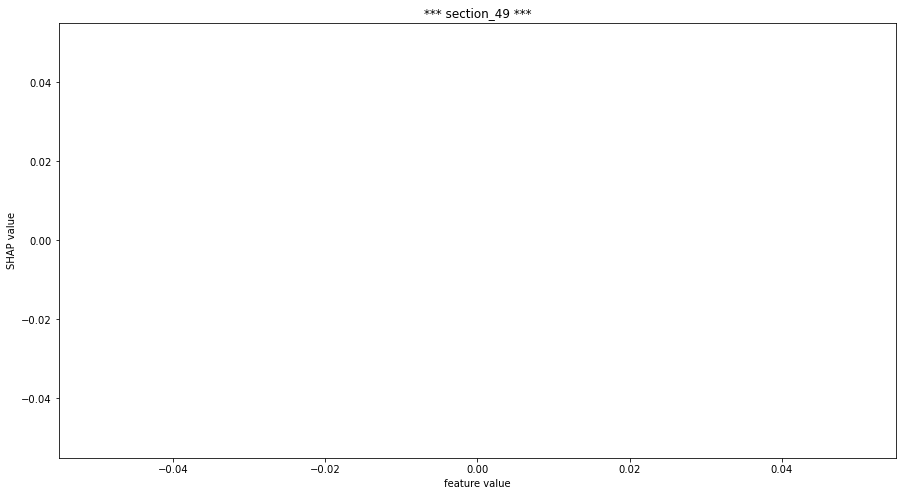


***** -0.1 ~ [0.0, 2] 구간 ******
 - 평균 :  nan
 - 표준편차 :  nan
 - 데이터 개수 :  0


Mean of empty slice.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in true_divide
invalid value encountered in double_scalars


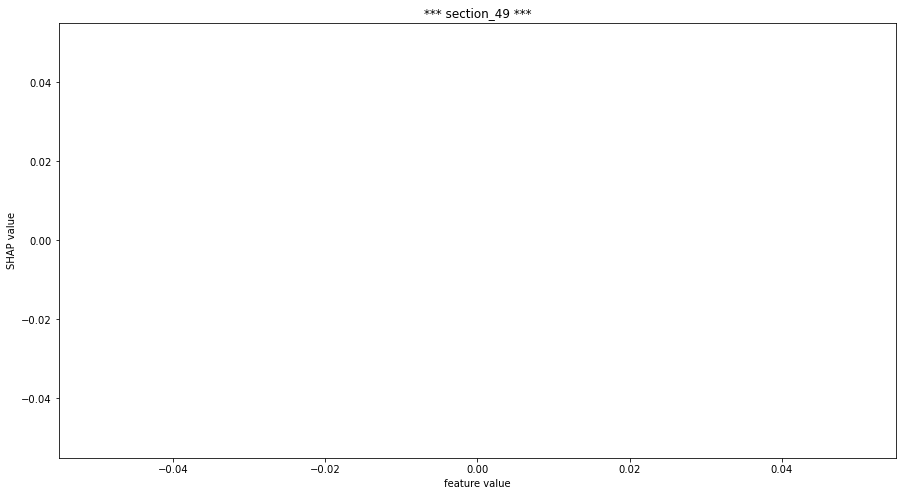


***** [0.0, 2] ~ [0.0, 2] 구간 ******
 - 평균 :  -0.20666983019783441
 - 표준편차 :  0.04677767867565167
 - 데이터 개수 :  8814


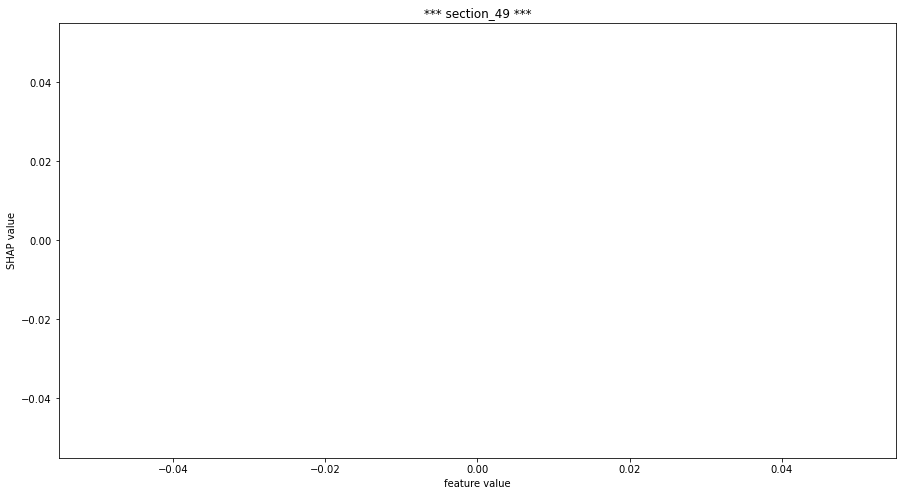


***** [0.0, 2] ~ 5.53217382 구간 ******
 - 평균 :  0.6181186981521194
 - 표준편차 :  0.3730513892118276
 - 데이터 개수 :  1000


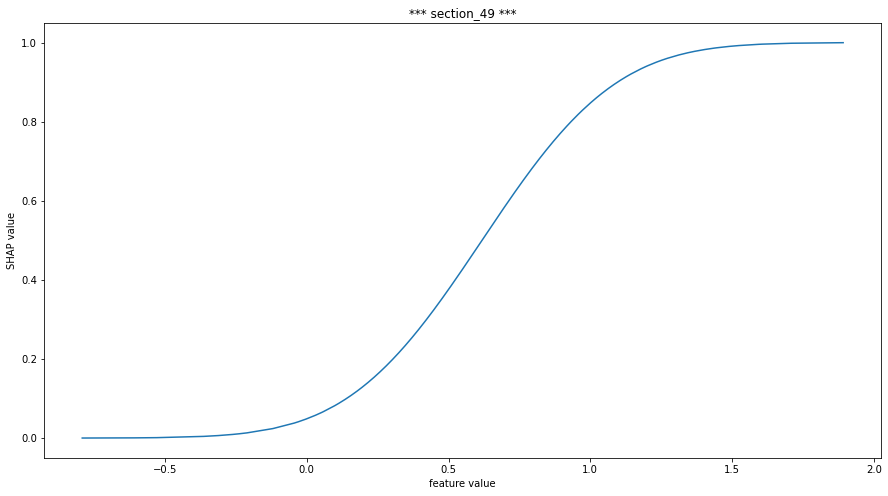


***** 5.53217382 ~ 6.171048703 구간 ******
 - 평균 :  1.6783389872881467
 - 표준편차 :  1.3459310612273472
 - 데이터 개수 :  1002


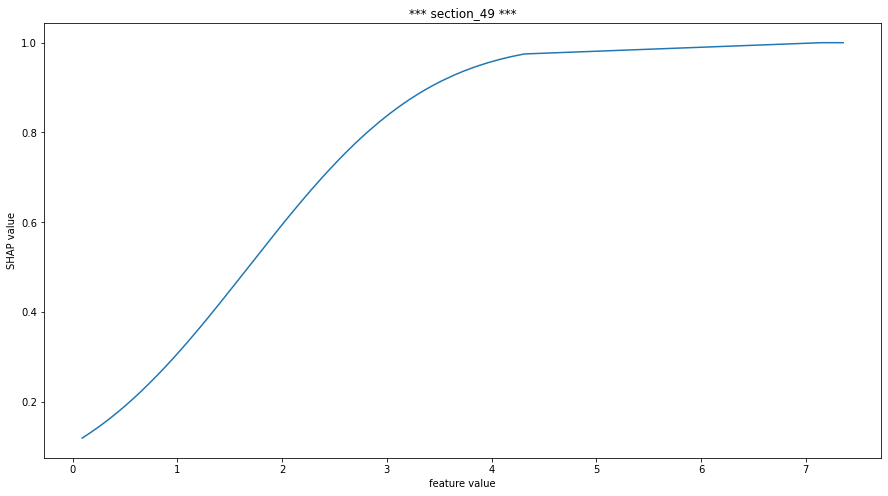


***** 6.171048703 ~ 8.946513251 구간 ******
 - 평균 :  3.266918053707614
 - 표준편차 :  0.6234903917791064
 - 데이터 개수 :  752


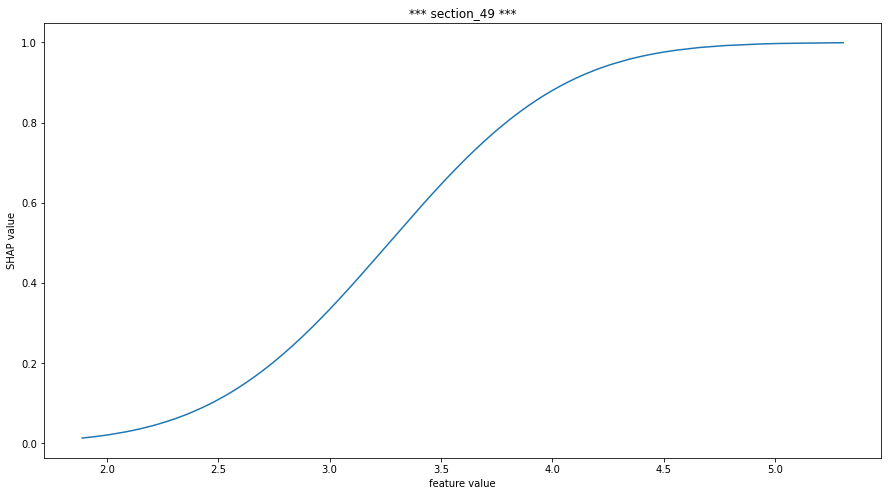

In [66]:
from scipy import stats

for featureName, cnt in zip(feature_li, range(len(feature_li))):
    
    print("------- "+featureName+" --------\n")
    
    global_feature_1=[]
    global_feature_2=[]
    global_mean=[]
    global_std=[]

    feature_value_col=featureName+'_Org'    # feature value가 있는 column
    SHAP_value_col=featureName+'_SHAP'      # SHAP value가 있는 column

    df, feature_max, feature_min, SHAP_max, SHAP_min=DataFrame(file_df, featureName)
    
    cdf=[]
    check=0
    pre_range = -0.1
    print(all_range_li[cnt]) # n 번째 즉, 지금 해당되는 feature의 range 구간
    df.values
    
    for j in range(len(all_range_li[cnt])): # 해당 feature의 범위 길이
        li=[]   # range 별 shap value 저장
        li_2=[]
        li_shap =[]
        li_2shap =[]
        cdf_range=[] # range 별 cdf 저장
                                                        
        cnt2 = 0                                
        if type(all_range_li[cnt][j]) == type([]) and check == 0:  # 리스트 다음에 리스트
            for i in df.values:
                if pre_range < i[0] and i[0] <= all_range_li[cnt][j][0]:
                    li.append([cnt2,i[1]]) # li : 주어진 범위에 해당되는 데이터의 순번과 shap value 값 저장 
                cnt2 += 1
            pre_range = all_range_li[cnt][j][0] # 다음 범위 탐색을 위한 변경
        elif type(all_range_li[cnt][j]) == type([]) and check == 1:
            for i in df.values:
                if pre_range < i[0] and i[0] < all_range_li[cnt][j][0]:
                    li.append([cnt2,i[1]])
                if all_range_li[cnt][j][0]== i[0]: # 리스트 x 다음에 리스트
                    li_2.append([cnt2,i[1]])
                cnt2 += 1
            check = 0
            pre_range = all_range_li[cnt][j][0]
        else:
            for i in df.values:
                if pre_range < i[0] and i[0] <= all_range_li[cnt][j]:
                    li.append([cnt2,i[1]])
                cnt2 += 1
            check = 1
            pre_range = all_range_li[cnt][j]
        for i in li:
            li_shap.append(i[1])  # 지금까지 수집한 range에 속하는 shap 값을 지니는 li의 값을 li_shap에 복사
        mean = np.mean(li_shap) # shap의 평균
        std = np.std(li_shap) # shap의 표준편차
        
        if j != 0:
            if len(set_all_range_li[cnt])<10:
                global_feature_1.append(all_range_li[cnt][j])
            else:
                global_feature_1.append(all_range_li[cnt][j-1])
        else:
            if len(set_all_range_li[cnt])<10:
                global_feature_1.append(all_range_li[cnt][j])
            else:
                global_feature_1.append(-0.1)
                
        global_feature_2.append(all_range_li[cnt][j])
        global_mean.append(mean)
        global_std.append(std)
        
        # global_feature_1,2 는 출력시 범위를 알려주는 변수로 value의 종류가 10개가 넘지 않으면 i ~ i 로
        # value의 종류가 10개를 넘으면 i-1 ~ i 로 출력 함
        
        print('***** '+str(global_feature_1[-1])+' ~ '+str(global_feature_2[-1])+' 구간 ******')
        print(" - 평균 : ", mean)
        print(" - 표준편차 : ", std)
        print(" - 데이터 개수 : ", len(li))
        
        for k in range(len(li)): 
            org_cdf=round(stats.norm.cdf(li[k][1],mean,std),6) # CDF 계산
            cdf.append([li[k][0], li[0],abs(org_cdf-0.5)*2]) # cdf에 index 값, shap 값, FOS 값 추가
            cdf_range.append(org_cdf)
        CDFgraph(li, cdf_range, featureName)
        
        if len(li_2) != 0: # feature value가 여러개고 한 feature value에 속하는 데이터가 1000개 이상일 때
            global_feature_1.append(all_range_li[cnt][j])
            global_feature_2.append(all_range_li[cnt][j])
            for i in li_2:
                li_2shap.append(i[1])
            mean = np.mean(li_2shap)
            std = np.std(li_2shap)
            global_mean.append(mean)
            global_std.append(std)
            for k in range(len(li_2)):
                org_cdf=round(stats.norm.cdf(li_2[k][1],mean,std),6)
                cdf.append([li_2[k][0], li_2[0],abs(org_cdf-0.5)*2])

            print('***** '+str(global_feature_1[-1])+' ~ '+str(global_feature_2[-1])+' 구간 ******')
            print(" - 평균 : ", mean)
            print(" - 표준편차 : ", std)
            print(" - 데이터 개수 : ", len(li_2))
            CDFgraph(li, cdf_range, featureName)

    
        
        
    if len(global_feature_1) < range_max:
        for k in range(range_max-len(global_feature_1)):
            global_feature_1.append(None)
            global_feature_2.append(None)
            global_mean.append(None)
            global_std.append(None)
        
    df_global[featureName+'_feature_1']=global_feature_1
    df_global[featureName+'_feature_2']=global_feature_2
    cdf.sort(key=lambda x:x[0])
    real_cdf = []
    for i in range(len(cdf)):
        real_cdf.append(cdf[i][2])
    # cdf 저장
#     print(len(df[feature_value_col]))
#     print(len(cdf))
    df_CDF[featureName]=df[feature_value_col]
    df_CDF[featureName+'_SHAP']=df[SHAP_value_col]
    df_CDF[featureName+'_FOS']=real_cdf

    # global 분석 정보 저장
    df_global[featureName+'_mean']=global_mean
    df_global[featureName+'_std']=global_std

    print()

In [67]:
# CDF 결과 저장
#df_CDF['predict_label']=file_df['predict_label']
df_CDF['real_label']=file_df['train_real_label']
df_CDF.to_csv(output_path+"label_"+str(class_type)+"_"+filename_out,sep=",",encoding='ms949', index=False)

# global 정보 저장
df_global.to_csv(output_path+"label_"+str(class_type)+"_"+global_filename,sep=",",encoding='ms949', index=False)

In [ ]:
df_CDF

In [ ]:
df_global